In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [11]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
print(data.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Accuracy: 0.912
Confusion Matrix:
 [[27300   153]
 [ 2487    60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     27453
           1       0.28      0.02      0.04      2547

    accuracy                           0.91     30000
   macro avg       0.60      0.51      0.50     30000
weighted avg       0.86      0.91      0.88     30000

Cross-validation scores: [0.91155 0.91185 0.912   0.9112  0.9104 ]
Mean cross-validation score: 0.9113999999999999


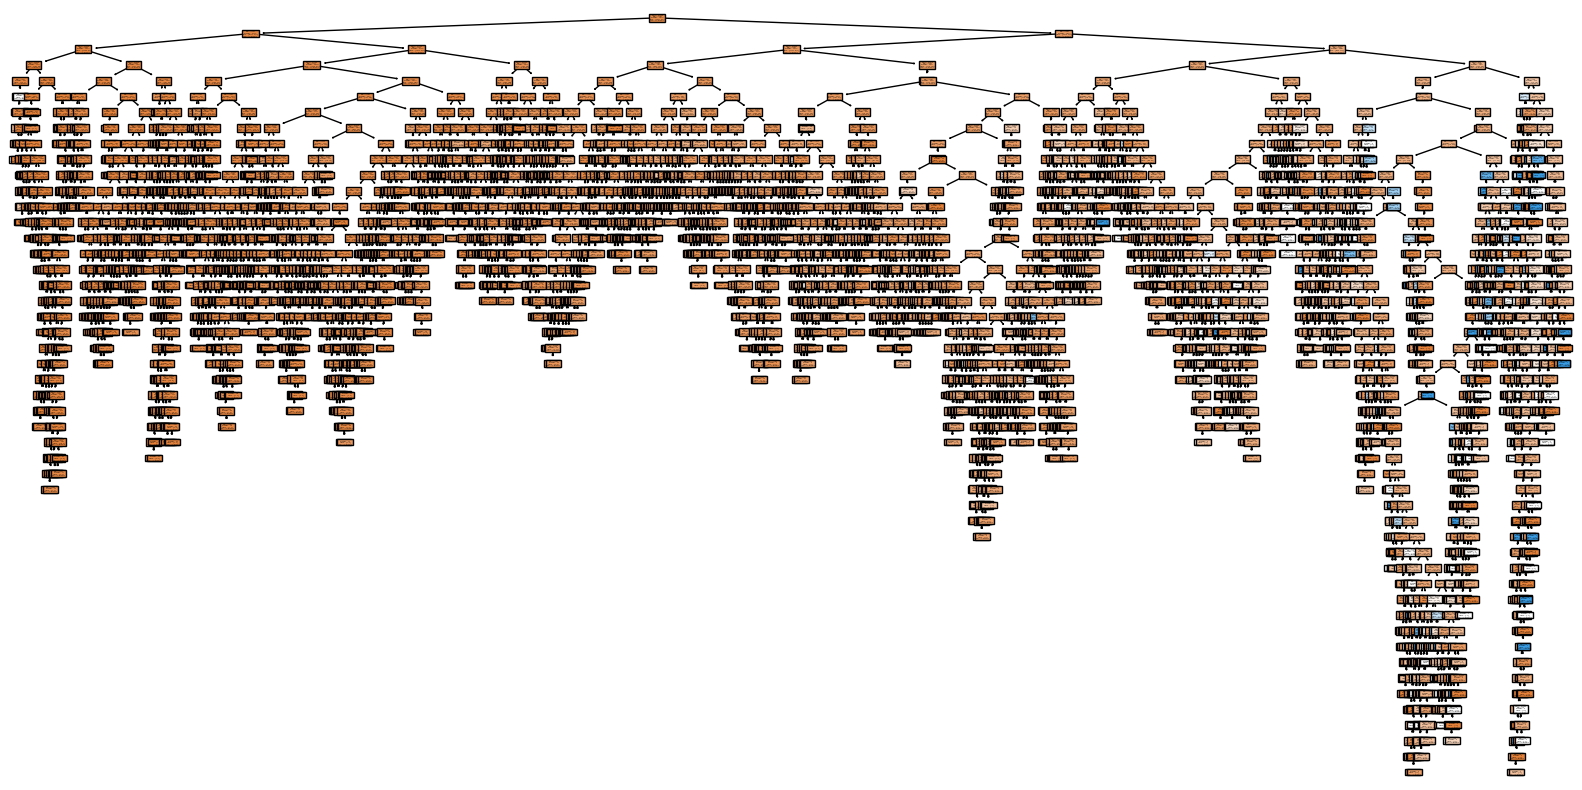

In [12]:
data = data[['bmi', 'diabetes']]
X = data[['bmi']]
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

cross_val_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=['bmi'], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


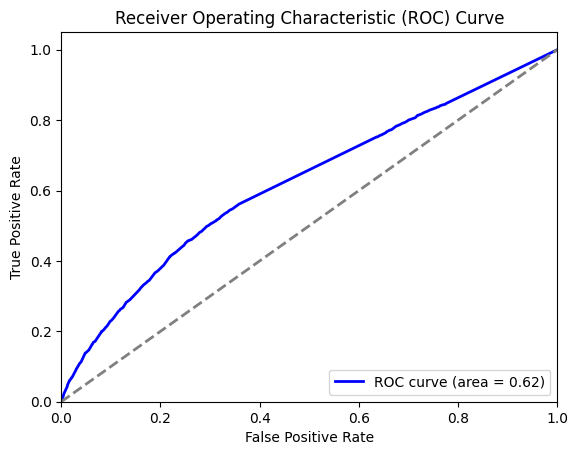

Optimal BMI threshold: 0.08333333333333333


In [13]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal BMI threshold:", optimal_threshold)